# Import

In [74]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [75]:
train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
sample_sub = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [76]:
print(train.shape)
train.head()

(165034, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [77]:
print(test.shape)
test.head()

(110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [78]:
print(sample_sub.shape)
sample_sub.head()

(110023, 2)


,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


# EDA

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Summary statistics
print("\nSummary statistics:")
train.describe()


Summary statistics:


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [81]:
train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0


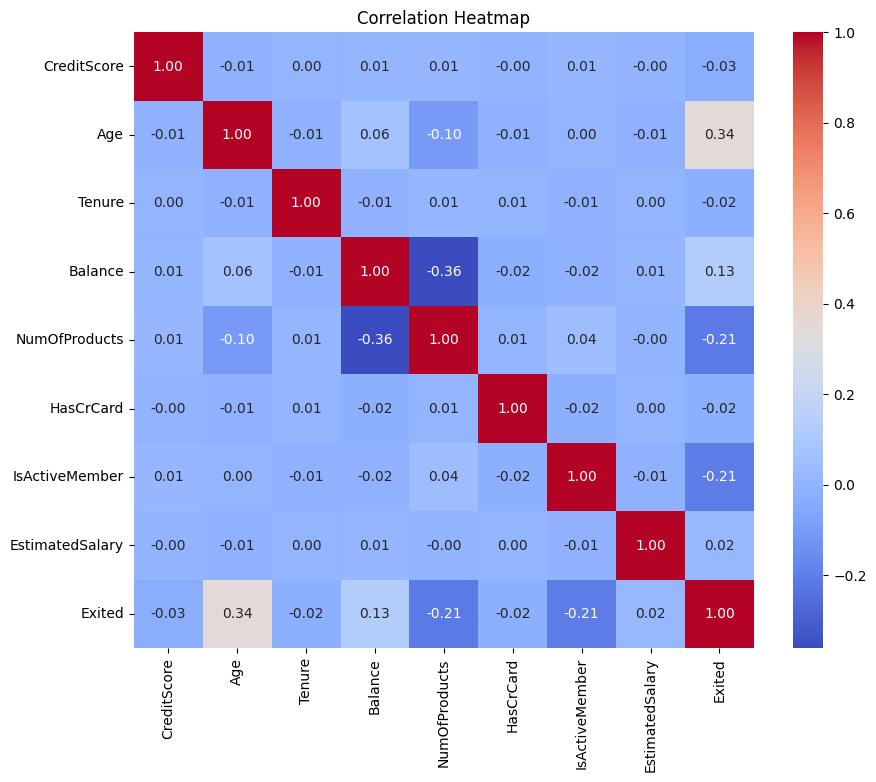

In [82]:
numeric_train = train.loc[:,['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

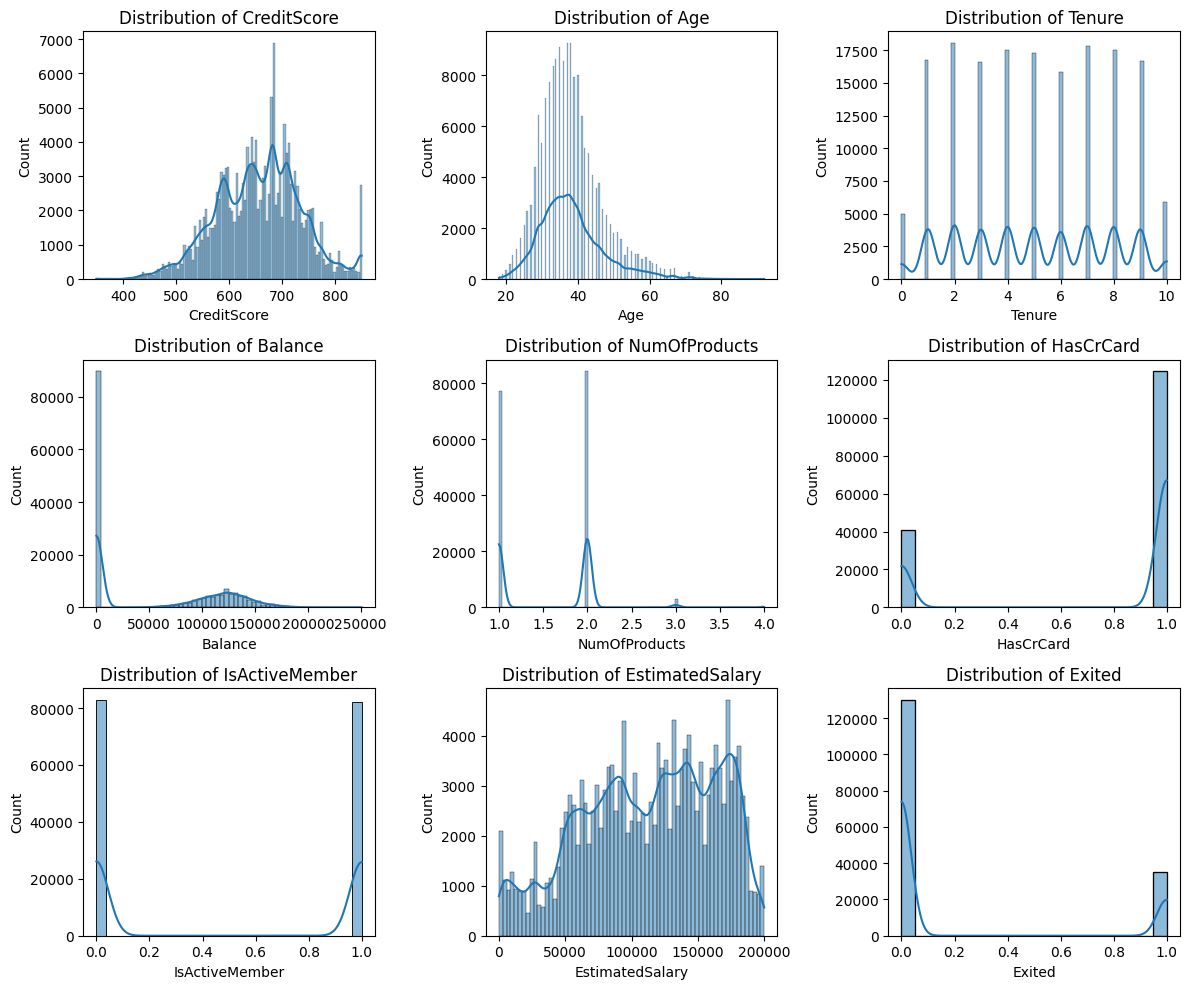

In [83]:
# Distribution of numeric variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_train.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(numeric_train[f'{col}'], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

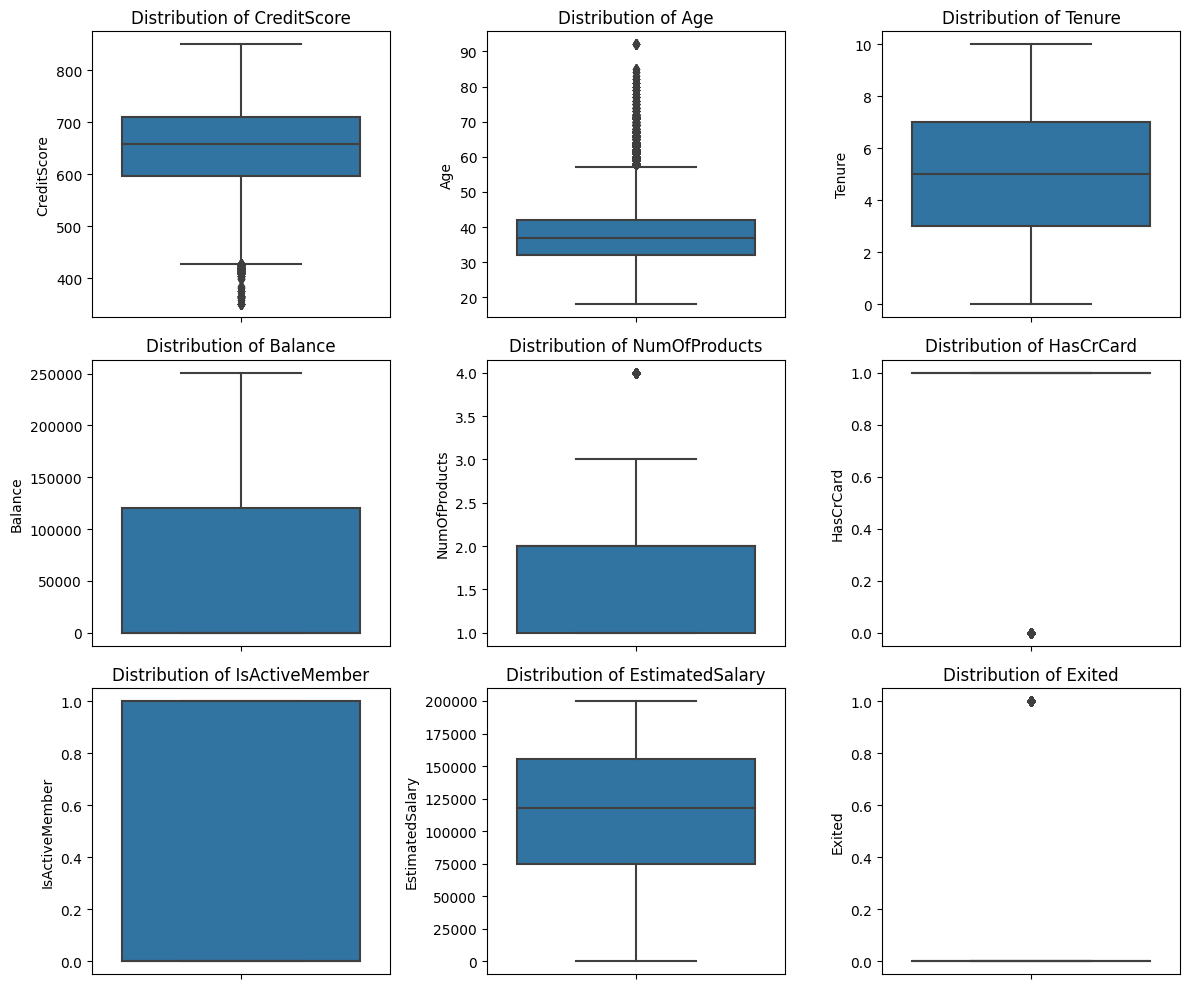

In [84]:
# Distribution of numeric variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_train.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

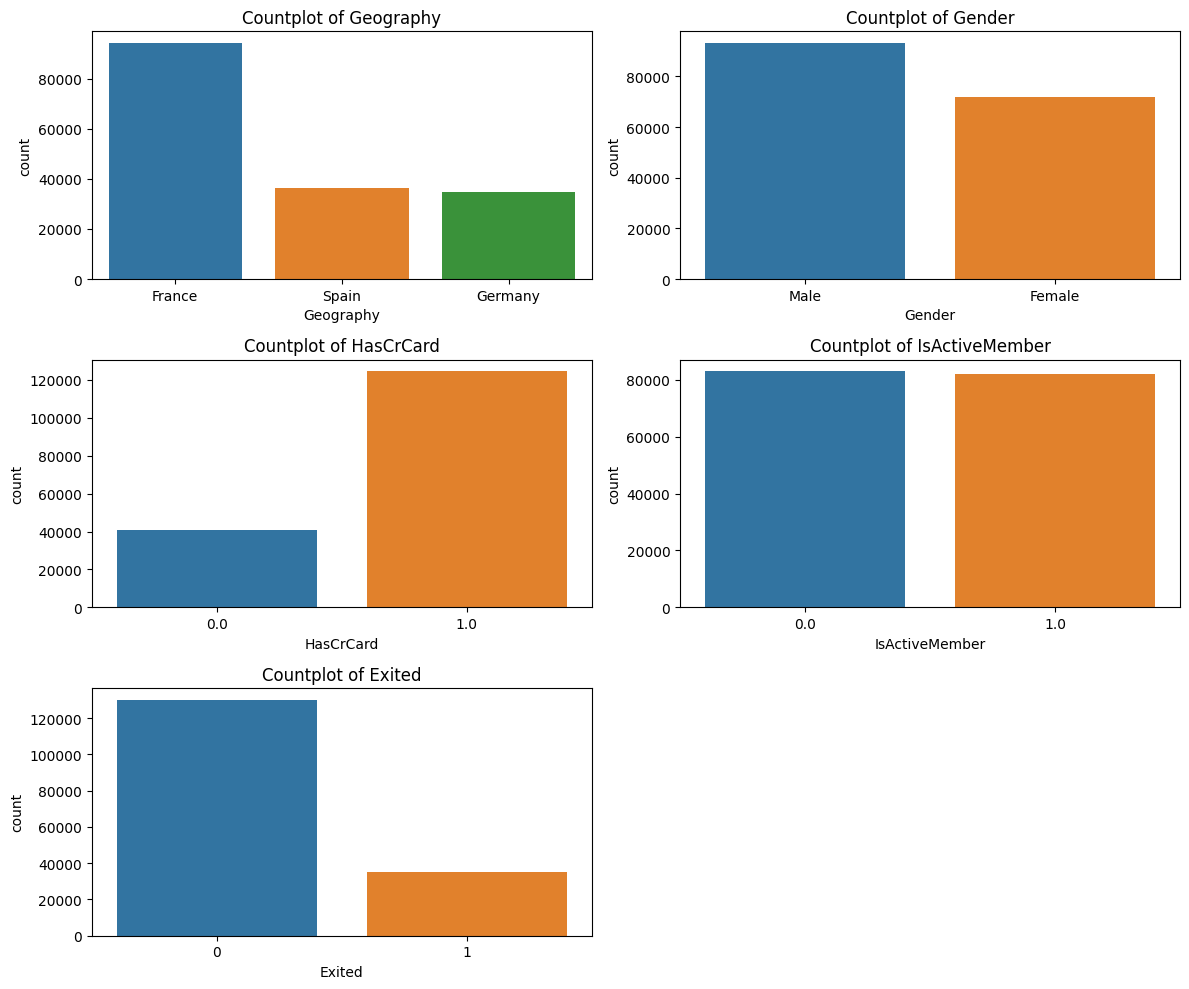

In [85]:
# Countplot of categorical variables
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=train, x=var)
    plt.title(f'Countplot of {var}')
plt.tight_layout()
plt.show()

# Model

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define the neural network architecture
class Model(nn.Module):
    def __init__(self, input_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)  # Dropout layer for regularization
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout
        x = self.sigmoid(self.fc4(x))
        return x
    
# One-hot encoding of categorical data
encoded_train = pd.get_dummies(train, columns=['Geography', 'Gender'], dtype = int)
encoded_train.head()

# Split data into features (X) and target (y)
X = encoded_train.drop(columns=['id', 'CustomerId', 'Surname', 'Exited']).values
y = encoded_train['Exited'].values

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create custom datasets and data loaders for train, validation, and test sets
train_dataset = CustomDataset(X_train_scaled, y_train)
val_dataset = CustomDataset(X_val_scaled, y_val)
test_dataset = CustomDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# Instantiate the model
input_size = X_train.shape[1]
model = Model(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adding weight decay for L2 regularization

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Early stopping parameters
patience = 5
early_stop_counter = 0
best_val_loss = float('inf')
best_model_state = None

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    
    # Calculate validation loss
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            val_loss += loss.item() * inputs.size(0)
            predicted = torch.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels.view(-1, 1)).sum().item()
        val_loss /= len(val_loader.dataset)
        val_accuracy = 100 * correct / total
    
    # Adjust learning rate
    scheduler.step(val_loss)
    
    # Print epoch statistics
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
    
    # Check if validation loss has decreased
    if val_loss < best_val_loss:  
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    # Check for early stopping
    if early_stop_counter >= patience:
        print(f"No improvement in validation loss for {patience} epochs. Early stopping...")
        break

Epoch 1/100, Train Loss: 0.3646, Val Loss: 0.3274, Val Accuracy: 86.40%
Epoch 2/100, Train Loss: 0.3370, Val Loss: 0.3262, Val Accuracy: 86.23%
Epoch 3/100, Train Loss: 0.3332, Val Loss: 0.3248, Val Accuracy: 86.47%
Epoch 4/100, Train Loss: 0.3326, Val Loss: 0.3243, Val Accuracy: 86.33%
Epoch 5/100, Train Loss: 0.3310, Val Loss: 0.3236, Val Accuracy: 86.43%
Epoch 6/100, Train Loss: 0.3306, Val Loss: 0.3245, Val Accuracy: 86.39%
Epoch 7/100, Train Loss: 0.3300, Val Loss: 0.3241, Val Accuracy: 86.42%
Epoch 8/100, Train Loss: 0.3286, Val Loss: 0.3259, Val Accuracy: 86.22%
Epoch 00009: reducing learning rate of group 0 to 5.0000e-04.
Epoch 9/100, Train Loss: 0.3291, Val Loss: 0.3241, Val Accuracy: 86.33%
Epoch 10/100, Train Loss: 0.3271, Val Loss: 0.3228, Val Accuracy: 86.34%
Epoch 11/100, Train Loss: 0.3258, Val Loss: 0.3231, Val Accuracy: 86.45%
Epoch 12/100, Train Loss: 0.3259, Val Loss: 0.3229, Val Accuracy: 86.42%
Epoch 13/100, Train Loss: 0.3260, Val Loss: 0.3238, Val Accuracy: 86.47

# Eval

In [87]:
# Load the best model state
model.load_state_dict(best_model_state)

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels.view(-1, 1)).sum().item()

print(f"Test Loss: {test_loss / len(test_loader.dataset):.4f}")
print(f"Test Accuracy: {(100 * correct / total):.2f}%")

Test Loss: 0.3198
Test Accuracy: 86.45%


# Prediction

In [94]:
import pandas as pd
import numpy as np

# One-hot encode 'Geography' and 'Gender' columns
encoded_test = pd.get_dummies(test, columns=['Geography', 'Gender'], dtype=int)

X_test_scaled = scaler.transform(encoded_test.drop(columns=['id', 'CustomerId', 'Surname']).values)

# Convert the preprocessed test data into PyTorch tensors
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Make predictions on the preprocessed test data
model.eval()
predictions = []

with torch.no_grad():
    for inputs in X_test_tensor:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        predictions.append(predicted.item())

# Convert predictions to numpy array
predictions = np.array(predictions)

# Print the predicted 'Exited' values for the test data
print("Predicted 'Exited' values for the test data:")
print(predictions)

Predicted 'Exited' values for the test data:
[0. 1. 0. ... 0. 0. 0.]


In [95]:
sample_sub['Exited'] = predictions
sample_sub

,id,Exited
0,165034,0.0
1,165035,1.0
2,165036,0.0
3,165037,0.0
4,165038,0.0
...,...,...
110018,275052,0.0
110019,275053,0.0
110020,275054,0.0
110021,275055,0.0


In [98]:
sample_sub.to_csv('submission.csv',index = False)